# Data exploration

In [4]:
import sys
import os
try:
    from google.colab import drive as google_drive # type: ignore
except:
    # no Google Colab --> fall back to local machine
    google_drive = None

if google_drive is not None:
    google_drive_directory = os.path.join('/','content','gdrive')
    google_drive.mount(google_drive_directory)
    root_dir = os.path.join(google_drive_directory, 'Othercomputers','My Laptop')
elif os.name == 'nt':
    # Windows
    root_dir = os.path.join('d:\\')
else:
    # Linux or other
    root_dir = os.path.expanduser('~')


project_path = os.path.join(root_dir, 'projects','exoplanets')
assert os.path.exists(project_path), f'Project path {project_path} not found!'
# enable import python files from this notebook's path
sys.path.append(project_path)
# enable reading images and data files from this notebook's path
os.chdir(project_path)

datasets_path = os.path.join(project_path, 'datasets')
assert os.path.exists(datasets_path), f'Datasets path {datasets_path} not found!'

output_path = os.path.join(project_path, 'output')
os.makedirs(output_path, exist_ok=True)
assert os.path.exists(output_path), f'Output path {output_path} not found!'

print(f'Current working directory: {os.getcwd()}')
print(f'Datasets path: {datasets_path}')
print(f'Output path: {output_path}')

Current working directory: /home/dror/projects/exoplanets
Datasets path: /home/dror/projects/exoplanets/datasets
Output path: /home/dror/projects/exoplanets/output


## Downloading dataset

Dataset pscomppars loaded with shape: (5893, 683)
Setting pl_name as index

Dropping columns with only null values or high ratio of nulls:
------------------------------------------------------------
There are 10 columns of type int64 with only null values:
['pl_orblperlim', 'pl_orbtperlim', 'pl_insollim', 'pl_tranmidlim', 'pl_ratrorlim', 'st_lumlim', 'st_masslim', 'st_denslim', 'st_radlim', 'sy_mnum']
------------------------------------------------------------
There are 236 columns of type float64 with only null values:
['glonerr1', 'glonerr2', 'glonsymerr', 'glaterr1', 'glaterr2', 'glatsymerr', 'elonerr1', 'elonerr2', 'elonsymerr', 'elaterr1', 'elaterr2', 'elatsymerr', 'pl_orbperformat', 'pl_orblpererr1', 'pl_orblper', 'pl_orblpererr2', 'pl_orblpersymerr', 'pl_orblperformat', 'pl_orblper_solnid', 'pl_orbsmaxformat', 'pl_orbinclerr1', 'pl_orbinclerr2', 'pl_orbinclsymerr', 'pl_orbinclformat', 'pl_orbtper', 'pl_orbtpererr1', 'pl_orbtpererr2', 'pl_orbtpersymerr', 'pl_orbtperformat', 'pl

### Columns Statistics Summary

,Data Type,Null Count,Unique Count
objectid,float64,0,5560
pl_letter,object,0,8
hostid,float64,0,4391
hostname,object,0,4403
tic_id,object,253,4159
...,...,...,...
cb_flag,int64,0,2
pl_angsep,float64,320,2304
pl_angsepstr,float64,320,2304
pl_ndispec,int64,0,6


### Feature Counts Summary

,Features Without Nulls,Features Fully Unique,Rest,Total per dtype
Data Type,,,,
float64,45,0,181,226
object,44,0,75,119
int64,52,0,0,52
Total,141,0,256,397


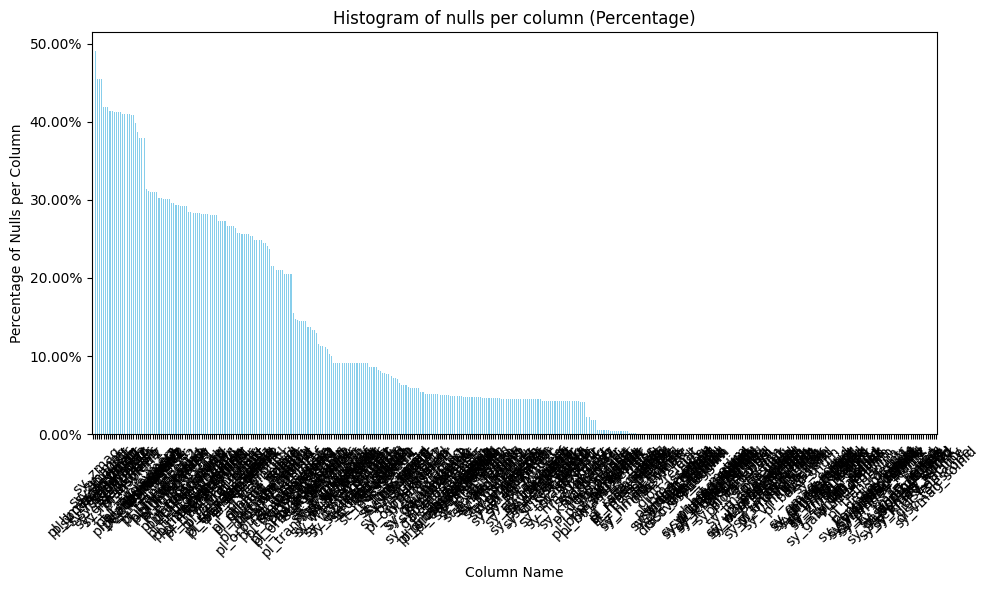

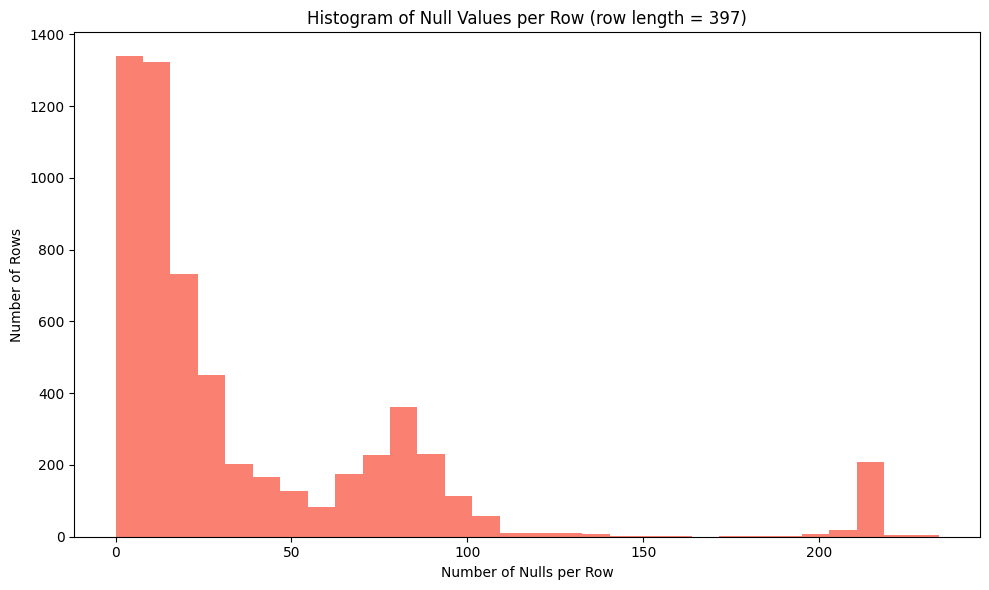

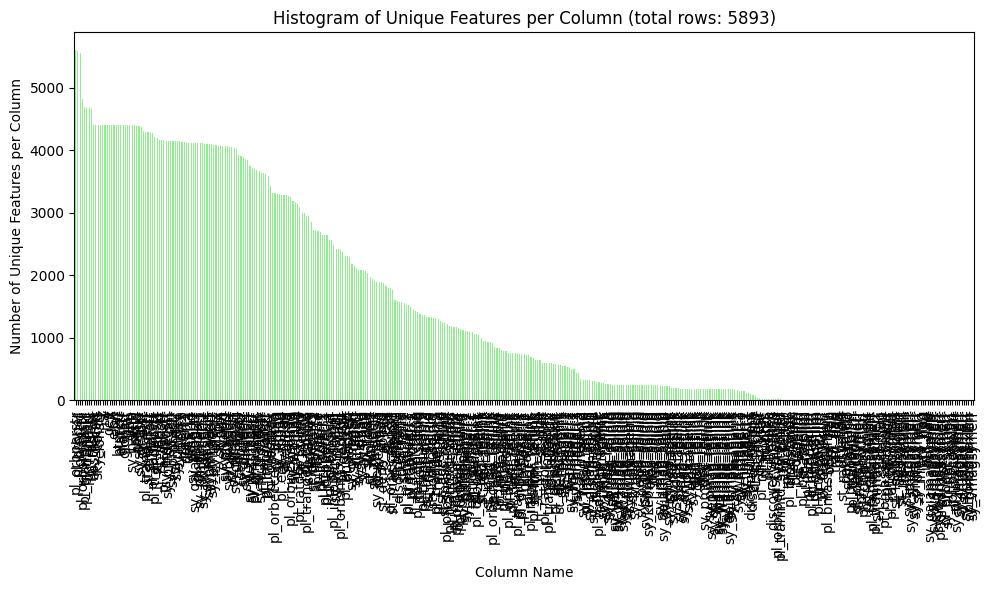

Final dataset shape: (5893, 397)


In [5]:
from python.data_loading import load_exoplanet_data, set_index_remove_null_columns
from python.display_utils import display_with_title
exoplanet_data = load_exoplanet_data(project_path=project_path)
combined_df, feature_counts = set_index_remove_null_columns(exoplanet_data)

In [6]:

display_with_title(exoplanet_data.describe(), "Full Dataset Description")

### Full Dataset Description

,objectid,hostid,disc_year,ra,raerr1,raerr2,rasymerr,ra_solnid,dec,decerr1,...,htm20,cb_flag,pl_angsep,pl_angseperr1,pl_angseperr2,pl_angseplim,pl_angsepformat,pl_angsepstr,pl_angsepsymerr,pl_ndispec
count,5893.000000,5893.000000,5893.000000,5893.000000,5.644000e+03,5.644000e+03,5893.000000,5893.000000,5893.000000,5.644000e+03,...,5.893000e+03,5893.000000,5573.000000,0.0,0.0,5573.0,0.0,5573.000000,0.0,5893.000000
mean,3.264017,2.435454,2016.625827,234.384096,2.618285e-07,-2.618285e-07,0.957746,4401.704943,19.127878,2.870182e-07,...,3.206748e+07,0.008315,480.026389,NaN,NaN,0.0,NaN,480.026389,NaN,0.008485
std,0.215480,0.178847,4.766830,91.181859,4.730295e-06,4.730295e-06,0.201184,246.687763,36.409526,5.131856e-06,...,1.262961e+09,0.090814,14183.200046,NaN,NaN,0.0,NaN,14183.200046,NaN,0.186790
min,3.100000,2.100330,1992.000000,0.185606,0.000000e+00,-1.630689e-04,0.000000,1.100000,-88.121111,0.000000e+00,...,-2.146451e+09,0.000000,0.003530,NaN,NaN,0.0,NaN,0.003530,NaN,0.000000
25%,3.121680,2.317170,2014.000000,176.482024,5.150778e-09,-1.086874e-08,1.000000,4400.100000,-9.509711,5.701583e-09,...,-1.069836e+09,0.000000,0.113000,NaN,NaN,0.0,NaN,0.113000,NaN,0.000000
50%,3.177400,2.504719,2016.000000,285.291930,6.875403e-09,-6.875403e-09,1.000000,4400.100000,39.550114,7.210556e-09,...,7.041805e+06,0.000000,0.274000,NaN,NaN,0.0,NaN,0.274000,NaN,0.000000
75%,3.324900,2.569212,2021.000000,293.300277,1.086874e-08,-5.150778e-09,1.000000,4400.100000,45.545545,9.655924e-09,...,1.169186e+09,0.000000,1.350000,NaN,NaN,0.0,NaN,1.350000,NaN,0.000000
max,3.999000,2.999700,2025.000000,359.974984,1.630689e-04,0.000000e+00,1.000000,5655.100000,86.860343,1.630689e-04,...,2.147324e+09,1.000000,689000.000000,NaN,NaN,0.0,NaN,689000.000000,NaN,6.000000


In [7]:
display_with_title(exoplanet_data.iloc[:5, :10], "Sample Data")


### Sample Data

,objectid,pl_name,pl_letter,hostid,hostname,hd_name,hip_name,tic_id,disc_pubdate,disc_year
0,3.12508,OGLE-2016-BLG-1227L b,b,2.104385,OGLE-2016-BLG-1227L,NaN,NaN,NaN,2020-03,2020
1,3.11023,HAT-P-3 b,b,2.103408,HAT-P-3,NaN,NaN,TIC 311035838,2007-09,2007
2,3.24410,Kepler-1065 b,b,2.430631,Kepler-1065,NaN,NaN,TIC 378012771,2016-05,2016
3,3.11091,HD 132406 b,b,2.573350,HD 132406,HD 132406,HIP 73146,TIC 309808219,2007-10,2007
4,3.12740,TOI-1260 c,c,2.572931,TOI-1260,NaN,NaN,TIC 355867695,2021-08,2021


## Problematic features:

### Features fully null or features with the same value: